In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [ ]:
#Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

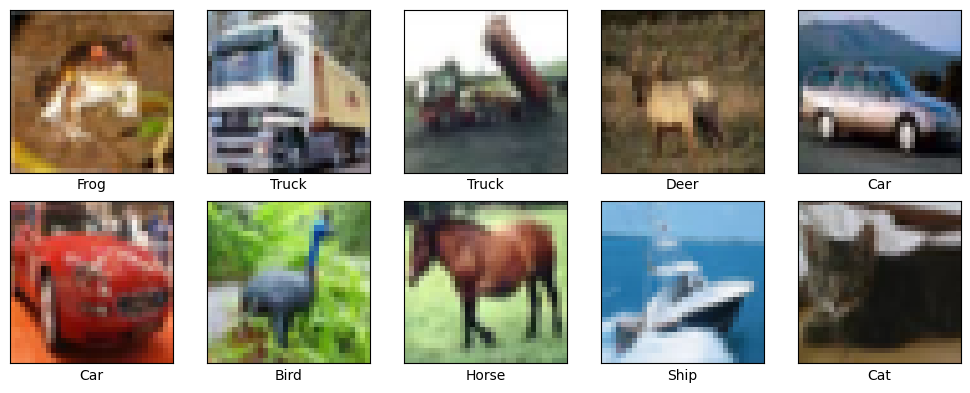

In [ ]:
#Display some sample images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

In [ ]:
#Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:

# Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3419 - loss: 1.7634 - val_accuracy: 0.5893 - val_loss: 1.1546
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.5928 - loss: 1.1507 - val_accuracy: 0.6377 - val_loss: 1.0305
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6613 - loss: 0.9739 - val_accuracy: 0.6733 - val_loss: 0.9457
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.6938 - loss: 0.8775 - val_accuracy: 0.6953 - val_loss: 0.8847
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7230 - loss: 0.7943 - val_accuracy: 0.6944 - val_loss: 0.8800
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7416 - loss: 0.7343 - val_accuracy: 0.7127 - val_loss: 0.8523
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7662 - loss: 0.6663 - val_accuracy: 0.6893 - val_loss: 0.9441
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7827 -

In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 5s - 15ms/step - accuracy: 0.7296 - loss: 0.8356

Test accuracy: 0.7296000123023987


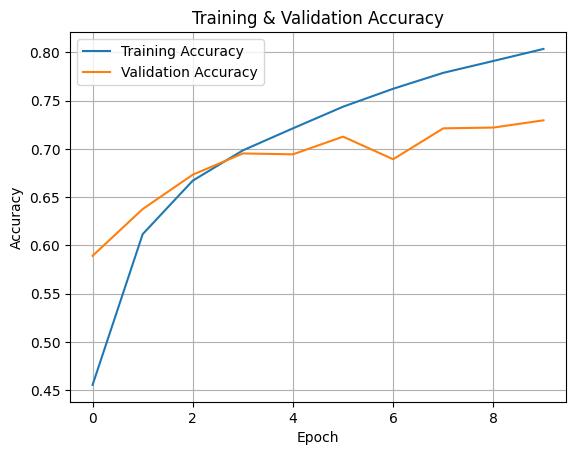

In [ ]:
# Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make Predictions
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = prob_model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
# Plot Predictions with Labels
def plot_image(i, predictions_array, true_label, img):
    true_label = true_label[i][0]
    img = img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    predicted_label = np.argmax(predictions_array[i])
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array[i]):.2f}%)", color=color)


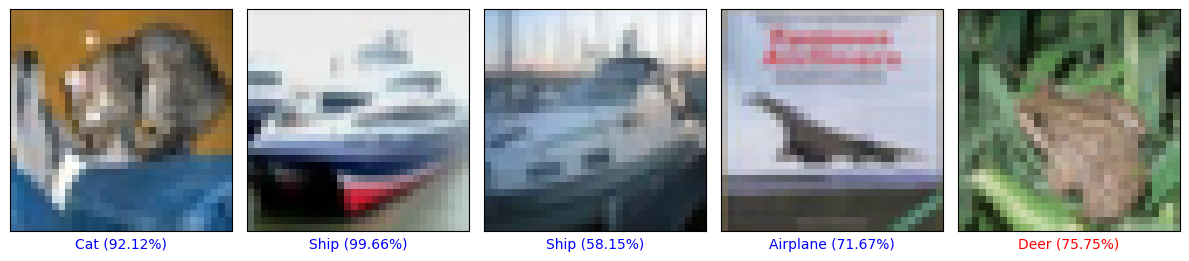

In [ ]:
# Show First 5 Test Predictions
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()